<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-Python/blob/Master/Sklearn_classification_clustering_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
colesterol = pd.read_csv('/content/colesterol.csv')

diabetes = pd.read_csv('/content/diabetes.csv')

batimentos = pd.read_csv('/content/batimentoscardiacos.csv')

In [4]:
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [5]:
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [6]:
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [15]:
x = diabetes.drop('resultado', axis = 1)
y = diabetes['resultado']

In [16]:
SEED = 4121988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [17]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(random_state = SEED, max_depth= 3)

In [18]:
clf.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=4121988)

In [19]:
clf.score(x_teste, y_teste)

0.640625

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
clf_dummy = DummyClassifier(strategy = 'most_frequent')

In [22]:
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [23]:
clf_dummy.score(x_teste, y_teste)

0.6197916666666666

In [24]:
x = batimentos[['Peso', 'Idade']]

In [25]:
y = batimentos['Batimentos cardiacos']

In [26]:
from sklearn.model_selection import train_test_split

SEED = 4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED)

In [27]:
from sklearn import linear_model

In [28]:
rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [29]:
rgs.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(fit_intercept=False, normalize=True)

In [30]:
rgs.score(x_teste, y_teste)

0.9872272899997122

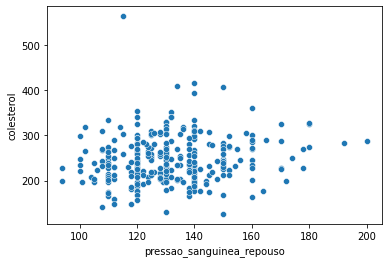

In [31]:
import seaborn as sns

sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 9)

In [38]:
kmeans.fit(x)
kmeans.labels_

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,